In [272]:
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
from nltk.tokenize import RegexpTokenizer
import json
import random
import seaborn

In [273]:
def dichotomizer(a1,a2):
    test=[]
    test.append(a1)
    test.append(a2)
#     test.append(a3)
    value=np.argmax(test)
    return (value),a1

In [320]:
def find_tpr_fpr(predict,real):
    tp=0
    tn=0
    fp=0
    fn=0
    for i in range(len(predict)):
        if predict[i]==0 and real[i]==0:
            tp=tp+1
        if predict[i]==1 and real[i]==0:
            fn=fn+1
        if predict[i]==0 and real[i]==1:
            fp=fp+1
        if predict[i]==1 and real[i]==1:
            tn=tn+1
    tpr2=0
    fpr2=0
#     print("Total :",(tp+fp+tn+fn))
    tpr2=tp/float(tp+fn+1)
    fpr2=fp/float(fp+tn+1)
    
    return tpr2,fpr2

In [321]:
#geeks for geeks 
def sort_list(list1, list2): 
  
    zipped_pairs = zip(list2, list1) 
  
    z = [x for _, x in sorted(zipped_pairs)] 
      
    return z 

In [317]:
def roc_design(prob_dist,testdata):
    aux1=[]
    aux2=[]
    testdata1=copy.deepcopy(testdata)
    for i in range(len(testdata)):
       
        aux1.append(prob_dist[i])
        aux2.append(testdata[i])
    main1=sort_list(aux2, aux1)
#     print("Probability in incresing order : ",main1)
    
    tpr=[]
    fpr=[]

   
    main2=[]
    j=0
    for j in range(len(prob_dist)):
        main2.append(0)
    i=0
    while i <len(prob_dist):
        tpr1=0
        fpr1=0
        
        
        
        j=0
        while (j  <= i):
            main2[j]=1
            j=j+1

        tpr1,fpr1=find_tpr_fpr(copy.deepcopy(main2),copy.deepcopy(main1))

        fpr.append(fpr1)
        tpr.append(tpr1)
        
        i=i+1

#     plt.plot(fpr, tpr ,'r-',label="ROC Curve")
# #     plt.axis([1, 10,0, 1])
#     plt.title("ROC Curve for Class 0's and Class 1's")
#     plt.xlabel("False +ve Rate")
#     plt.ylabel("True +ve Rate")
#     plt.legend()
 

#     plt.axis([-0.01, 1, 0, 1])
#     plt.show()
    return fpr,tpr
        
    
    
    
        

In [277]:
def classified_metric(class_set,result_set):
    count=0
    for i in range(len(class_set)):
        if class_set[i]==result_set[i]:
            count=count+1
    return count/float(len(result_set))

    

In [278]:
def discriminant_func(data,mean,covariance_mat,prior,d):   
        inverse_mat=np.linalg.inv(np.matrix(covariance_mat))
        result_mat=(-0.5)*np.matmul(np.matrix(data-mean),inverse_mat)
        temp_result=np.matmul(result_mat,np.transpose(np.matrix(data-mean)))
        result=temp_result[0][0]-0.5*d*np.log(2*np.pi)-0.5*np.log(np.linalg.det(np.matrix(covariance_mat)))+np.log(prior)
    
        return result
    
    
    
    

In [279]:
def decorrelation_cal(class1,covariance_mat2):
    eigen_vector=np.linalg.eig(covariance_mat2)
    return eigen_vector

In [280]:
def decision_boundary(test_set,test_main_set,mean1,mean2,covariance_mat1,covariance_mat2,prior1,prior2):
    x=[]
    y=[]
    for i in range(len(test_set)):
        x.append(test_set[i][0])
        y.append(test_set[i][1])
    xmin=min(x)
    xmax=max(x)
    ymin=min(y)
    ymax=max(y)
    start1=xmin
    plt_x=[]
    plt_y=[]
    test_class=[]
    counter=10000
    flag1=0
    flag2=0
    while(counter>0):
        x1=random.randint(int(xmin*1000),int(xmax*1000))
        y1=random.randint(int(ymin*1000),int(ymax*1000))
        plt_x.append(x1/1000)
        plt_y.append(y1/1000)
        g1=discriminant_func(np.matrix([x1/1000,y1/1000]),np.matrix(mean1),np.matrix(covariance_mat1),prior1,2)
        g2=discriminant_func(np.matrix([x1/1000,y1/1000]),np.matrix(mean2),np.matrix(covariance_mat2),prior2,2)
        label=dichotomizer(g1,g2)
        test_class.append(label[0])
        counter=counter-1
    
#     while(start1<xmax):
        
#         start2=ymin
#         while(start2<ymax):

#             start2=start2+0.15
#         start1=start1+0.15
    for i in range(len(plt_x)):
        if test_class[i]==0:
            plt.scatter(plt_x[i],plt_y[i],color='yellow')
            
            # plt.legend()
    
        elif test_class[i]==1:
             plt.scatter(plt_x[i],plt_y[i],color='#d3d3d3')
#             plt.xlabel("x-value")
#             plt.ylabel("y-value")
#             plt.title("Visualization of Decision Boundary")
            # plt.legend()
#     print(test_class)
    for i in range(len(test_set)):
    
#         g1=discriminant_func(np.matrix(test_set[i]),np.matrix(mean1),np.matrix(covariance_mat1),prior1,2)
#         g2=discriminant_func(np.matrix(test_set[i]),np.matrix(mean2),np.matrix(covariance_mat2),prior2,2)
#         label=dichotomizer(g1,g2)
        if test_main_set[i]==0 and flag1==0:
    
            plt.scatter(test_set[i][0],test_set[i][1],color='red',label="Class0")
            flag1=1
        if test_main_set[i]==0 and flag1==1:
            plt.scatter(test_set[i][0],test_set[i][1],color='red')
            
        if test_main_set[i]==1 and flag2==0:
       
            plt.scatter(test_set[i][0],test_set[i][1],color='blue',label="Class1")
            flag2=1
        if test_main_set[i]==1 and flag2==1:
                plt.scatter(test_set[i][0],test_set[i][1],color='blue')
       
        
    plt.xlabel("x-value")
    plt.ylabel("y-value")
    plt.title("Visualization of  Decision Boundary")
    plt.legend()
    plt.show()
            
            
    

In [318]:
def decision_boundary_risk(test_set,test_main_set,mean1,mean2,covariance_mat1,covariance_mat2,prior1,prior2,risk_new):
    x=[]
    y=[]
    for i in range(len(test_set)):
        x.append(test_set[i][0])
        y.append(test_set[i][1])
    xmin=min(x)
    xmax=max(x)
    ymin=min(y)
    ymax=max(y)
    start1=xmin
    plt_x=[]
    plt_y=[]
    test_class=[]
    counter=10000
    flag1=0
    flag2=0
    flag3=0
    flag4=0
    while(counter>0):
        x1=random.randint(int(xmin*1000),int(xmax*1000))
        y1=random.randint(int(ymin*1000),int(ymax*1000))
        plt_x.append(x1/1000)
        plt_y.append(y1/1000)
        g1=discriminant_func(np.matrix([x1/1000,y1/1000]),np.matrix(mean1),np.matrix(covariance_mat1),prior1,2)
        g2=discriminant_func(np.matrix([x1/1000,y1/1000]),np.matrix(mean2),np.matrix(covariance_mat2),prior2,2)
        risk1=risk_new[0][0]*g1+risk_new[0][1]*g2
        risk2=risk_new[1][0]*g1+risk_new[1][1]*g2
        
        if risk1>risk2:
            label=1
        else:
            label=0
        test_class.append(label)
        counter=counter-1
    
#     while(start1<xmax):
        
#         start2=ymin
#         while(start2<ymax):

#             start2=start2+0.15
#         start1=start1+0.15
    for i in range(len(plt_x)):
        if test_class[i]==0 and flag3==0:
            plt.scatter(plt_x[i],plt_y[i],color='yellow',label="Datapoint Class0")
            flag3=1
            # plt.legend()
        if test_class[i]==0 and flag3==1:
            plt.scatter(plt_x[i],plt_y[i],color='yellow')
            
            # plt.legend()
        if test_class[i]==1 and flag4==0:
            plt.scatter(plt_x[i],plt_y[i],color='#d3d3d3',label="Datapoint Class1")
            flag4=1
        if test_class[i]==1 and flag4==1:
            plt.scatter(plt_x[i],plt_y[i],color='#d3d3d3')
#             plt.xlabel("x-value")
#             plt.ylabel("y-value")
#             plt.title("Visualization of Decision Boundary")
            # plt.legend()
#     print(test_class)
    for i in range(len(test_set)):
    
#         g1=discriminant_func(np.matrix(test_set[i]),np.matrix(mean1),np.matrix(covariance_mat1),prior1,2)
#         g2=discriminant_func(np.matrix(test_set[i]),np.matrix(mean2),np.matrix(covariance_mat2),prior2,2)
#         label=dichotomizer(g1,g2)
        if test_main_set[i]==0 and flag1==0:
    
            plt.scatter(test_set[i][0],test_set[i][1],color='red',label="Class0")
            flag1=1
        if test_main_set[i]==0 and flag1==1:
            plt.scatter(test_set[i][0],test_set[i][1],color='red')
            
        if test_main_set[i]==1 and flag2==0:
       
            plt.scatter(test_set[i][0],test_set[i][1],color='blue',label="Class1")
            flag2=1
        if test_main_set[i]==1 and flag2==1:
                plt.scatter(test_set[i][0],test_set[i][1],color='blue')
       
        
    plt.xlabel("x-value")
    plt.ylabel("y-value")
    plt.title("Visualization of  Decision Boundary")
    plt.legend()
    plt.show()
            
            
    

In [281]:

f=open("train.txt","r")
tokenizer=RegexpTokenizer('',gaps=True)
s=f.read()
data=[]
data=s.split("\n")
main_data=[]
for i in range(len(data)):
    temp=[]
    
    temp=(data[i].split(","))
#     parseIntOrFloat()
    main_data.append(temp)
main_data= main_data[:-1]
# print(main_data)
# print(s)
train_set=[]
for i in range(len(main_data)):
    for j in range(len(main_data[i])):
        main_data[i][j]=float(main_data[i][j])
train_set=copy.deepcopy(main_data)

In [282]:
f=open("test_all.txt","r")
tokenizer=RegexpTokenizer('',gaps=True)
s=f.read()
data=[]
data=s.split("\n")
main_data=[]
for i in range(len(data)):
    temp=[]
    temp=(data[i].split(","))
#     parseIntOrFloat()
    main_data.append(temp)
main_data= main_data[:-1]
# print(main_data)
# print(s)
test_set=[]
for i in range(len(main_data)):
    for j in range(len(main_data[i])):
        main_data[i][j]=float(main_data[i][j])
test_set=copy.deepcopy(main_data)

In [283]:
class_set=[]
for i in range(len(train_set)):
        class_set.append(train_set[i][2])
        train_set[i]=train_set[i][:-1]

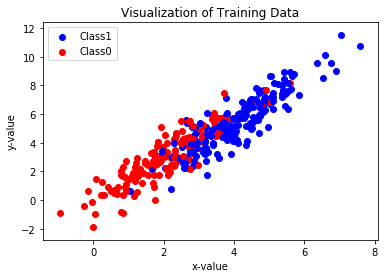

In [284]:

#Visualization for traindata
flag1=0
flag2=0
for i in range(len(train_set)):
    if class_set[i]==0 and flag1==0:

        plt.scatter(train_set[i][0],train_set[i][1],color='red',label="Class0")
        flag1=1
    if class_set[i]==0 and flag1==1:
        plt.scatter(train_set[i][0],train_set[i][1],color='red')

    if class_set[i]==1 and flag2==0:

        plt.scatter(train_set[i][0],train_set[i][1],color='blue',label="Class1")
        flag2=1
    if class_set[i]==1 and flag2==1:
            plt.scatter(train_set[i][0],train_set[i][1],color='blue')


plt.xlabel("x-value")
plt.ylabel("y-value")
plt.title("Visualization of Training Data")
plt.legend()
plt.show()

In [285]:
test_main_set=[]
for i in range(len(test_set)):
        test_main_set.append(test_set[i][2])
        test_set[i]=test_set[i][:-1]

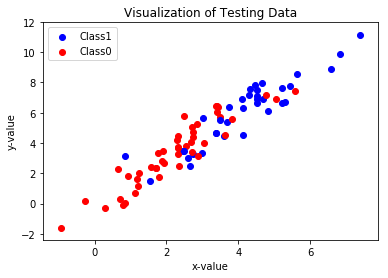

In [286]:
#Visualization for testdata
flag1=0
flag2=0
for i in range(len(test_set)):
    if test_main_set[i]==0 and flag1==0:

        plt.scatter(test_set[i][0],test_set[i][1],color='red',label="Class0")
        flag1=1
    if test_main_set[i]==0 and flag1==1:
        plt.scatter(test_set[i][0],test_set[i][1],color='red')

    if test_main_set[i]==1 and flag2==0:

        plt.scatter(test_set[i][0],test_set[i][1],color='blue',label="Class1")
        flag2=1
    if test_main_set[i]==1 and flag2==1:
            plt.scatter(test_set[i][0],test_set[i][1],color='blue')


plt.xlabel("x-value")
plt.ylabel("y-value")
plt.title("Visualization of Testing Data")
plt.legend()
plt.show()


In [287]:

class0=[]
class1=[]
for i in range(len(class_set)):
    class_set[i]=int(class_set[i])
for i in range(len(train_set)):
    if class_set[i]==0:
        class0.append(train_set[i])
    else:
        class1.append(train_set[i])

In [288]:
prior1=len(class0)/float(len(class0)+len(class1))
prior2=1-prior1
d=2
temp1=[]
temp2=[]
for i in range(len(class0)):
    temp1.append(class0[i][0])
    temp2.append(class0[i][1])

In [289]:
m1=np.mean(temp1)
m2=np.mean(temp2)
covariance_mat1=np.cov(temp1,temp2)
mean1=[]
mean1.append(m1)
mean1.append(m2)

In [290]:
# #Decorrelation for class0
# dec1=decorrelation_cal(class0,covariance_mat1)
# dec2=decorrelation_cal(class1,covariance_mat2)
# class0=np.matmul(dec1,class0)
# class1=np.matmul(dec2,class1)
# temp1=[]
# temp2=[]
# for i in range(len(class0)):
#     temp1.append(class0[i][0])
#     temp2.append(class0[i][1])
# m1=np.mean(temp1)
# m2=np.mean(temp2)
# covariance_mat1=np.cov(temp1,temp2)
# mean1=[]
# mean1.append(m1)
# mean1.append(m2)

In [291]:
temp1=[]
temp2=[]
for i in range(len(class1)):
    temp1.append(class1[i][0])
    temp2.append(class1[i][1])
m1=np.mean(temp1)
m2=np.mean(temp2)
covariance_mat2=np.cov(temp1,temp2)
mean2=[]
mean2.append(m1)
mean2.append(m2)

In [292]:
#Decorrelation for class0 and class1 for training set
dec1=decorrelation_cal(class0,covariance_mat1)
dec2=decorrelation_cal(class1,covariance_mat2)
class0=np.matmul(np.linalg.inv(dec1[1]),np.transpose(class0))
class1=np.matmul(np.linalg.inv(dec2[1]),np.transpose(class1))
class0=list(np.transpose(class0))
class1=list(np.transpose(class1))
train_set1=[]
train_set1=class0+class1
temp1=[]
temp2=[]
for i in range(len(class0)):
    temp1.append(class0[i][0])
    temp2.append(class0[i][1])
# x=[]
# y=[]
# for i in range(len(class0)):
#     x.append(class0[i][0])
#     y.append(class0[i][1])
# print(np.cov(temp1,temp2))
m1=np.mean(temp1)
m2=np.mean(temp2)
covariance_mat1=np.cov(temp1,temp2)
mean1=[]
mean1.append(m1)
mean1.append(m2)
temp1=[]
temp2=[]
for i in range(len(class1)):
    temp1.append(class1[i][0])
    temp2.append(class1[i][1])
m1=np.mean(temp1)
m2=np.mean(temp2)
covariance_mat2=np.cov(temp1,temp2)
mean2=[]
mean2.append(m1)
mean2.append(m2)
class_set1=[]
for i in range(len(class0)):
    class_set1.append(0)
for i in range(len(class1)):
    class_set1.append(1) 

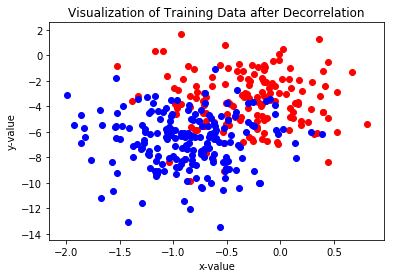

In [293]:
#Visualization for trainset after decorelation
flag1=0
flag2=0
for i in range(len(train_set1)):
    if class_set1[i]==0 and flag1==0:

        plt.scatter(train_set1[i][0],train_set1[i][1],color='red',label="Class0")
        flag1=1
    if class_set1[i]==0 and flag1==1:
        plt.scatter(train_set1[i][0],train_set1[i][1],color='red')

    if class_set1[i]==1 and flag2==0:

        plt.scatter(train_set1[i][0],train_set1[i][1],color='blue',label="Class1")
        flag2=1
    if class_set1[i]==1 and flag2==1:
            plt.scatter(train_set1[i][0],train_set1[i][1],color='blue')


plt.xlabel("x-value")
plt.ylabel("y-value")
plt.title("Visualization of Training Data after Decorrelation")
# plt.legend()
plt.show()

In [294]:
#Accuracy
test_class=[]
prob_measure=[]
for i in range(len(train_set1)):
    g1=discriminant_func(np.matrix(train_set1[i]),np.matrix(mean1),np.matrix(covariance_mat1),prior1,2)
    g2=discriminant_func(np.matrix(train_set1[i]),np.matrix(mean2),np.matrix(covariance_mat2),prior2,2)
    label=dichotomizer(g1,g2)
    prob_measure.append(label[1])
    test_class.append(label[0])
acc=classified_metric(class_set1,test_class)*100
print("Accuracy : ",acc)

Accuracy :  84.0


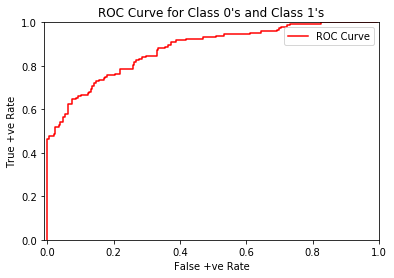

In [295]:
f1=[]
g1=[]
f1,t1=roc_design(prob_measure,test_class)

..............Confusion Matrix................ 
119 	 25
31 	 175


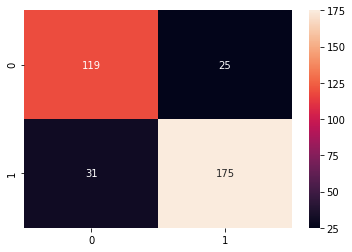

In [296]:
#Confusion matrix
tp=0
tn=0
fp=0
fn=0
for i in range(len(train_set1)):
    g1=discriminant_func(np.matrix(train_set1[i]),np.matrix(mean1),np.matrix(covariance_mat1),prior1,2)
    g2=discriminant_func(np.matrix(train_set1[i]),np.matrix(mean2),np.matrix(covariance_mat2),prior2,2)
    g=dichotomizer(g1,g2)[0]
    if g==0 and class_set1[i]==0:
        tp=tp+1
        continue
    if g==1 and class_set1[i]==1:
        tn=tn+1
        continue
    if g==0 and class_set1[i]==1:
        fp=fp+1
        continue
    if g==1 and class_set1[i]==0:
        fn=fn+1
print("..............Confusion Matrix................ ")
print(tp,"\t",fp)
print(fn,"\t",tn)
conf_matrix=[[],[]]
conf_matrix[0].append(tp)
conf_matrix[0].append(fp)
conf_matrix[1].append(fn)
conf_matrix[1].append(tn)
seaborn.heatmap(conf_matrix,annot=True,fmt="d")

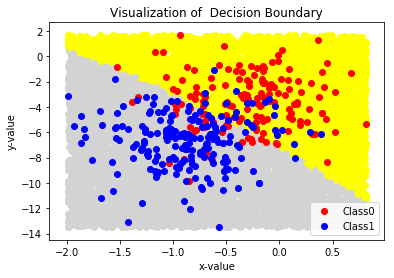

In [297]:
decision_boundary(train_set1,class_set1,mean1,mean2,covariance_mat1,covariance_mat2,prior1,prior2)

In [298]:
    
#Comment hta do neeche ka
# class0=[]
# class1=[]
# for i in range(len(test_main_set)):
#     test_main_set[i]=float(test_main_set[i])

# for i in range(len(test_set)):
#     if test_main_set[i]==0:
#         class0.append(test_set[i])
#     else:
#         class1.append(test_set[i])

In [299]:
#Decorrelation for class0 and class1 for testing set
# dec1=decorrelation_cal(class0,covariance_mat1)
# dec2=decorrelation_cal(class1,covariance_mat2)
test0=np.matmul(np.linalg.inv(dec1[1]),np.transpose(test_set))
test1=np.matmul(np.linalg.inv(dec2[1]),np.transpose(test_set))
test0=list(np.transpose(test0))
test1=list(np.transpose(test1))
#Comment hta do neeche ka
# test_set1=[]

# test_set1=class0+class1
#yha tak
# print(np.cov(x,y))
# temp1=[]
# temp2=[]
# for i in range(len(class0)):
#     temp1.append(class0[i][0])
#     temp2.append(class0[i][1])
# m1=np.mean(temp1)
# m2=np.mean(temp2)
# covariance_mat1=np.cov(temp1,temp2)
# mean1=[]
# mean1.append(m1)
# mean1.append(m2)
# temp1=[]
# temp2=[]
# for i in range(len(class1)):
#     temp1.append(class1[i][0])
#     temp2.append(class1[i][1])
# m1=np.mean(temp1)
# m2=np.mean(temp2)
# covariance_mat2=np.cov(temp1,temp2)
# mean2=[]
# mean2.append(m1)
# mean2.append(m2)

In [300]:
# for i in range(len(test_main_set)):
#     test_main_set[i]=int(test_main_set[i])

In [301]:
# #Decorrelation for class0 and class1 for testing set

# # dec1=decorrelation_cal(class0,covariance_mat1)
# # dec2=decorrelation_cal(class1,covariance_mat2)
# class0=np.matmul(dec1[1],np.transpose(class0))
# class1=np.matmul(dec2[1],np.transpose(class1))
# class0=np.transpose(class0)
# class1=np.transpose(class1)
# temp1=[]
# temp2=[]
# for i in range(len(class0)):
#     temp1.append(class0[i][0])
#     temp2.append(class0[i][1])
# m1=np.mean(temp1)
# m2=np.mean(temp2)
# covariance_mat1=np.cov(temp1,temp2)
# mean1=[]
# mean1.append(m1)
# mean1.append(m2)
# temp1=[]
# temp2=[]
# for i in range(len(class1)):
#     temp1.append(class1[i][0])
#     temp2.append(class1[i][1])
# m1=np.mean(temp1)
# m2=np.mean(temp2)
# covariance_mat2=np.cov(temp1,temp2)
# mean2=[]
# mean2.append(m1)
# mean2.append(m2)

In [302]:
#Neeche ka hta do
# test_main_set=[]
# for i in range(len(class0)):
#     test_main_set.append(0)
# for i in range(len(class1)):
#     test_main_set.append(1)


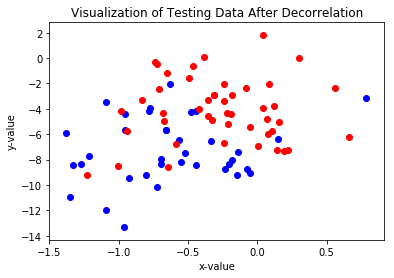

In [303]:
#Decorrelation according to Class0 training data deccorelation matrix
#Visualization for traindata
flag1=0
flag2=0
for i in range(len(test0)):
    if test_main_set[i]==0 and flag1==0:

        plt.scatter(test0[i][0],test0[i][1],color='red',label="Class0")
        flag1=1
    if test_main_set[i]==0 and flag1==1:
        plt.scatter(test0[i][0],test0[i][1],color='red')

    if test_main_set[i]==1 and flag2==0:

        plt.scatter(test0[i][0],test0[i][1],color='blue',label="Class1")
        flag2=1
    if test_main_set[i]==1 and flag2==1:
            plt.scatter(test0[i][0],test0[i][1],color='blue')


plt.xlabel("x-value")
plt.ylabel("y-value")
plt.title("Visualization of Testing Data After Decorrelation")
# plt.legend()
plt.show()

In [304]:
#Accuracy
test_class=[]
prob_measure=[]
for i in range(len(test0)):
    g1=discriminant_func(np.matrix(test0[i]),np.matrix(mean1),np.matrix(covariance_mat1),prior1,2)
    g2=discriminant_func(np.matrix(test0[i]),np.matrix(mean2),np.matrix(covariance_mat2),prior2,2)
    label=dichotomizer(g1,g2)
    prob_measure.append(label[1])
    test_class.append(label[0])
acc=classified_metric(test_main_set,test_class)*100
print("Accuracy : ",acc)

Accuracy :  81.25


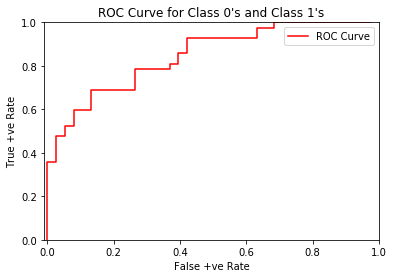

In [305]:
f1=[]
g1=[]
f1,t1=roc_design(prob_measure,test_class)

..............Confusion Matrix................ 
36 	 6
9 	 29


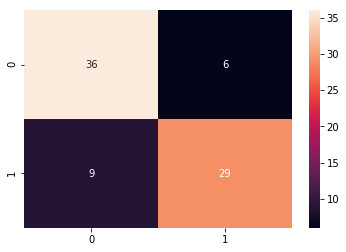

In [306]:
#Confusion matrix
tp=0
tn=0
fp=0
fn=0
for i in range(len(test0)):
    g1=discriminant_func(np.matrix(test0[i]),np.matrix(mean1),np.matrix(covariance_mat1),prior1,2)
    g2=discriminant_func(np.matrix(test0[i]),np.matrix(mean2),np.matrix(covariance_mat2),prior2,2)
    g=dichotomizer(g1,g2)[0]
    if g==0 and test_main_set[i]==0:
        tp=tp+1
        continue
    if g==1 and test_main_set[i]==1:
        tn=tn+1
        continue
    if g==0 and test_main_set[i]==1:
        fp=fp+1
        continue
    if g==1 and test_main_set[i]==0:
        fn=fn+1
print("..............Confusion Matrix................ ")
print(tp,"\t",fp)
print(fn,"\t",tn)
conf_matrix=[[],[]]
conf_matrix[0].append(tp)
conf_matrix[0].append(fp)
conf_matrix[1].append(fn)
conf_matrix[1].append(tn)
seaborn.heatmap(conf_matrix,annot=True,fmt="d")

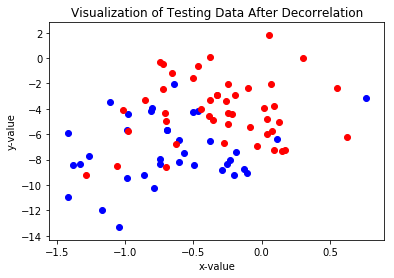

In [307]:

#Decorrelation according to Class0 training data deccorelation matrix
#Visualization for traindata
flag1=0
flag2=0
for i in range(len(test1)):
    if test_main_set[i]==0 and flag1==0:

        plt.scatter(test1[i][0],test1[i][1],color='red',label="Class0")
        flag1=1
    if test_main_set[i]==0 and flag1==1:
        plt.scatter(test1[i][0],test1[i][1],color='red')

    if test_main_set[i]==1 and flag2==0:

        plt.scatter(test1[i][0],test1[i][1],color='blue',label="Class1")
        flag2=1
    if test_main_set[i]==1 and flag2==1:
            plt.scatter(test1[i][0],test1[i][1],color='blue')


plt.xlabel("x-value")
plt.ylabel("y-value")
plt.title("Visualization of Testing Data After Decorrelation")
# plt.legend()
plt.show()

In [308]:
# #Accuracy
# test_class=[]

# for i in range(len(test1)):
    
#     g1=discriminant_func(np.matrix(test0[i]),np.matrix(mean1),np.matrix(covariance_mat1),prior1,d)
#     g2=discriminant_func(np.matrix(test1[i]),np.matrix(mean2),np.matrix(covariance_mat2),prior2,d)
#     label=dichotomizer(g1,g2)
#     test_class.append(label)
# #Neeche ka hta do comment
# # for i in range(len(class1)):
    
# #     g1=discriminant_func(np.matrix(class1[i]),np.matrix(mean1),np.matrix(covariance_mat1),prior1,d)
# #     g2=discriminant_func(np.matrix(class1[i]),np.matrix(mean2),np.matrix(covariance_mat2),prior2,d)
# #     label=dichotomizer(g1,g2)
# #     test_class.append(label)
# acc=classified_metric(test_main_set,test_class)*100

In [309]:
# print("Accuracy : ",acc)

Accuracy :  0.0


In [313]:
#Q3
f=open("risk.txt")
risk={}
risk=f.read()
print(risk)
risk_main = json.loads(risk)


{"risk1": [[0, 1], [1, 0]], "risk2": [[1, 0], [0, 1]], "risk3": [[1000, 1000], [0, 0]], "risk4": [[0, 0], [1000, 1000]], "risk5": [[0, 100], [150, 0]], "risk6": [[0, 150], [100, 0]]}


In [314]:
test_set=copy.deepcopy(test0)

[[0, 1], [1, 0]]
Accuracy  80  :  81.25


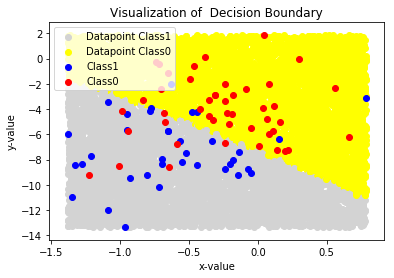

..............Confusion Matrix................ 
36 	 6
9 	 29
Confusion Matrix:  risk1  :


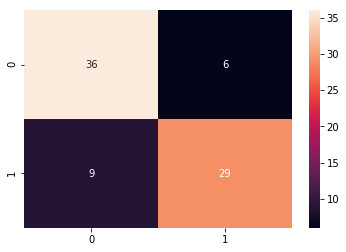

[[1, 0], [0, 1]]
Accuracy  80  :  18.75


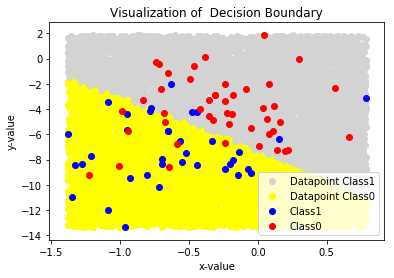

..............Confusion Matrix................ 
9 	 29
36 	 6
Confusion Matrix:  risk2  :


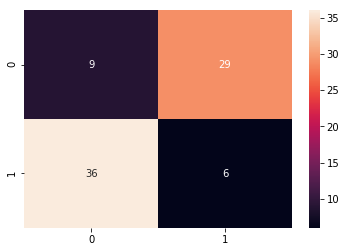

[[1000, 1000], [0, 0]]
Accuracy  80  :  56.25


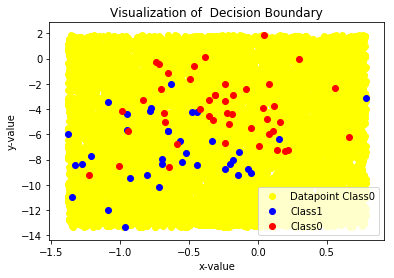

..............Confusion Matrix................ 
45 	 35
0 	 0
Confusion Matrix:  risk3  :


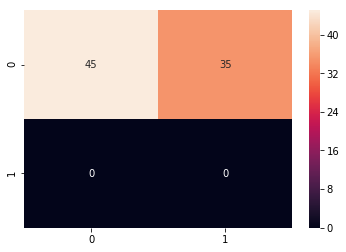

[[0, 0], [1000, 1000]]
Accuracy  80  :  43.75


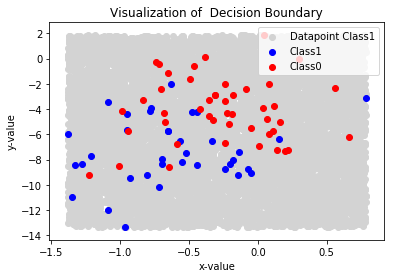

..............Confusion Matrix................ 
0 	 0
45 	 35
Confusion Matrix:  risk4  :


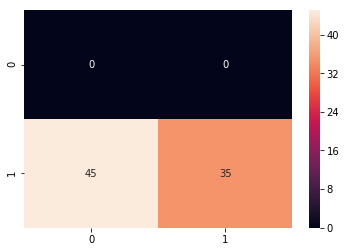

[[0, 100], [150, 0]]
Accuracy  80  :  66.25


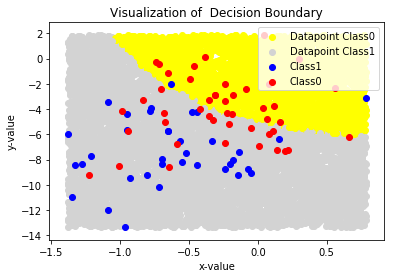

..............Confusion Matrix................ 
20 	 2
25 	 33
Confusion Matrix:  risk5  :


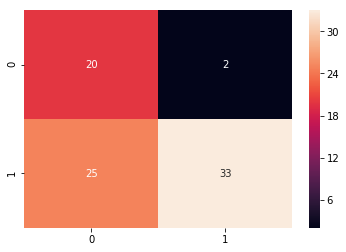

[[0, 150], [100, 0]]
Accuracy  80  :  70.0


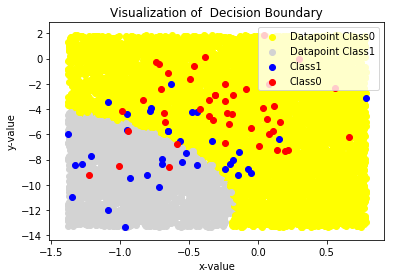

..............Confusion Matrix................ 
40 	 19
5 	 16
Confusion Matrix:  risk6  :


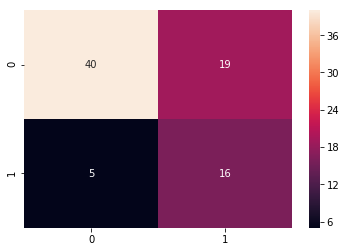

[81.25, 18.75, 56.25, 43.75, 66.25, 70.0]


In [322]:
#Accuracy

acc=[]
roc1=[]
roc2=[]
for j in risk_main.keys():
    test_class=[]
    risk_new=[]
    prob_measure=[]
    risk_new=[]
    risk_new=list(risk_main[j])
    print(risk_new)
#     print(risk_new)
    for i in range(len(test_set)):
    
        g1=discriminant_func(np.matrix(test_set[i]),np.matrix(mean1),np.matrix(covariance_mat1),prior1,d)
        g2=discriminant_func(np.matrix(test_set[i]),np.matrix(mean2),np.matrix(covariance_mat2),prior2,d)
        risk1=risk_new[0][0]*g1+risk_new[0][1]*g2
        risk2=risk_new[1][0]*g1+risk_new[1][1]*g2
        prob_measure.append(risk1)
        if risk1>risk2:
            label=1
        else:
            label=0
        test_class.append(label)
    
    acc1=classified_metric(test_main_set,test_class)*100    
    print("Accuracy ",(i+1)," : ",acc1)
    f1=[]
    g1=[]
    f1,g1=roc_design(prob_measure,test_class)
    roc1.append(g1)
    roc2.append(f1)
    #Decision Boundary
#     print("Decision Boundary ",j)
    decision_boundary_risk(test_set,test_main_set,mean1,mean2,covariance_mat1,covariance_mat2,prior1,prior2,risk_new)
    
#     Confusion matrix
    tp=0
    tn=0
    fp=0
    fn=0
    for i in range(len(test_set)):
        g1=discriminant_func(np.matrix(test_set[i]),np.matrix(mean1),np.matrix(covariance_mat1),prior1,2)
        g2=discriminant_func(np.matrix(test_set[i]),np.matrix(mean2),np.matrix(covariance_mat2),prior2,2)
        risk1=risk_new[0][0]*g1+risk_new[0][1]*g2
        risk2=risk_new[1][0]*g1+risk_new[1][1]*g2
        prob_measure.append(risk1)
        if risk1>risk2:
            g=1
        else:
            g=0
        if g==0 and test_main_set[i]==0:
            tp=tp+1
            continue
        if g==1 and test_main_set[i]==1:
            tn=tn+1
            continue
        if g==0 and test_main_set[i]==1:
            fp=fp+1
            continue
        if g==1 and test_main_set[i]==0:
            fn=fn+1
    print("..............Confusion Matrix................ ")
    print(tp,"\t",fp)
    print(fn,"\t",tn)
    conf_matrix=[[],[]]
    conf_matrix[0].append(tp)
    conf_matrix[0].append(fp)
    conf_matrix[1].append(fn)
    conf_matrix[1].append(tn)
    print("Confusion Matrix: ", (j)," :")
    seaborn.heatmap(conf_matrix,annot=True,fmt="d")
    plt.show()
    
    
    
#     print(test_class)
    acc.append(acc1)
print(acc)     


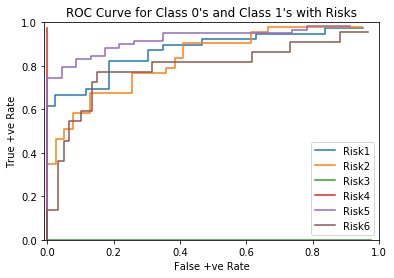

In [324]:
for i in range(len(roc1)):
    if i==0:
        plt.plot(roc1[i], roc2[i] ,label="Risk1")
    if i==1:
        plt.plot(roc1[i], roc2[i] ,label="Risk2")
    if i==2:
        
        plt.plot(roc1[i], roc2[i] ,label="Risk3")
    if i==3:
        plt.plot(roc1[i], roc2[i] ,label="Risk4")
    if i==4:
        
        plt.plot(roc1[i], roc2[i] ,label="Risk5")
    if i==5:
        plt.plot(roc1[i], roc2[i] ,label="Risk6")
    plt.title("ROC Curve for Class 0's and Class 1's with Risks")
    plt.xlabel("False +ve Rate")
    plt.ylabel("True +ve Rate")
    plt.legend()
    plt.axis([-0.01, 1, 0, 1])

plt.show()

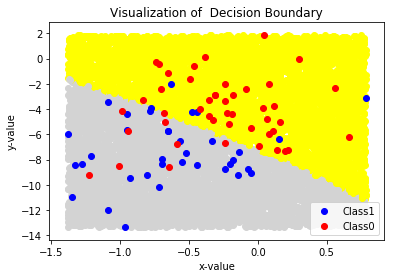

In [323]:
decision_boundary(test0,test_main_set,mean1,mean2,covariance_mat1,covariance_mat2,prior1,prior2)